## H5 processor

In [6]:
from asreviewcontrib.visualization.plot import Plot
import os
import glob
from asreviewcontrib.statistics import StateStatistics

In [49]:
# find all h5 files in subfolders of directory
files = glob.glob(os.path.join(r'simulation_output', '*.h5'), recursive=False)
files[:]

['simulation_output\\lr_doc2vec.h5',
 'simulation_output\\lr_sbert.h5',
 'simulation_output\\lr_tfidf.h5',
 'simulation_output\\nb_tfidf.h5',
 'simulation_output\\nn-2-layer_doc2vec.h5',
 'simulation_output\\nn-2-layer_sbert.h5',
 'simulation_output\\rf_doc2vec.h5',
 'simulation_output\\rf_tfidf.h5',
 'simulation_output\\svm_tfidf.h5']

In [9]:
def stats(file):
    print(StateStatistics.from_path(file))

## visualize plots

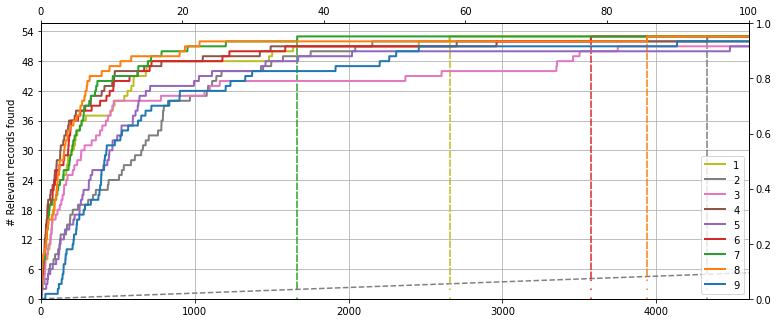

In [41]:
with Plot.from_paths(files[:]) as plot:
  inc_plot = plot.new("inclusion", result_format="number")
  inc_plot.set_grid()
  inc_plot.set_xlim(0, 4600)
  inc_plot.ax.legend([1,2,3,4,5,6,7,8,9], loc='lower right')
  inc_plot.add_random(add_text=False)

  inc_plot.ax2.set_xlabel("")

  all_files = all(plot.is_file.values())
  for key in list(plot.analyses):
      if all_files or not plot.is_file[key]:
          inc_plot.add_wss(
              key, 100, add_value=True, add_text=False)

  inc_plot.fig.set_size_inches(12, 5, forward=True)

  inc_plot.show()
  inc_plot.save("plots\simulation_results_1.png")

In [73]:
stats('simulation_output\\lr_tfidf.h5')

************  lr_tfidf.h5  ***************

-----------  general  -----------
Number of runs            : 1
Number of papers          : 46376
Number of included papers : 63
Number of excluded papers : 46313
Number of unlabeled papers: 0
Number of queries         : 1667

-----------  settings  -----------
data_name         : brouwer_clean
model             : logistic
query_strategy    : max
balance_strategy  : double
feature_extraction: tfidf
n_instances       : 1
n_queries         : min
n_prior_included  : 10
n_prior_excluded  : 10
mode              : simulate
model_param       : {'C': 1.0, 'class_weight': 1.0, 'n_jobs': 1}
query_param       : {}
feature_param     : {'ngram_max': 1, 'stop_words': 'english', 'split_ta': 0, 'use_keywords': 0}
balance_param     : {'a': 2.155, 'alpha': 0.94, 'b': 0.789, 'beta': 1.0}

-----------    ATD    -----------
 0.0056

Time to discovery:

    row   : value
    31313 : 1.0
    27937 : 2.0
    43564 : 4.0
    13393 : 6.0
    23946 : 7.0
    31135 : 8.

## NB switchpoint runs

In [77]:
stats('simulation_output\\nb_tfidf.h5')

************  nb_tfidf.h5  ***************

-----------  general  -----------
Number of runs            : 1
Number of papers          : 46376
Number of included papers : 63
Number of excluded papers : 46313
Number of unlabeled papers: 0
Number of queries         : 3575

-----------  settings  -----------
data_name         : brouwer_clean
model             : nb
query_strategy    : max
balance_strategy  : double
feature_extraction: tfidf
n_instances       : 1
n_queries         : min
n_prior_included  : 10
n_prior_excluded  : 10
mode              : simulate
model_param       : {'alpha': 3.822}
query_param       : {}
feature_param     : {'ngram_max': 1, 'stop_words': 'english', 'split_ta': 0, 'use_keywords': 0}
balance_param     : {'a': 2.155, 'alpha': 0.94, 'b': 0.789, 'beta': 1.0}

-----------    ATD    -----------
 0.00773

Time to discovery:

    row   : value
    31313 : 1.0
    27937 : 2.0
    43564 : 6.0
    11685 : 7.0
    13393 : 10.0
    16226 : 13.0
    26603 : 14.0
    30552 : 

In [56]:
NB_files = glob.glob(os.path.join(r'simulation_output\NB', '*.h5'), recursive=False)
NB_files[:]

['simulation_output\\NB\\lr_tf-idf.h5', 'simulation_output\\NB\\nb_tf-idf.h5']

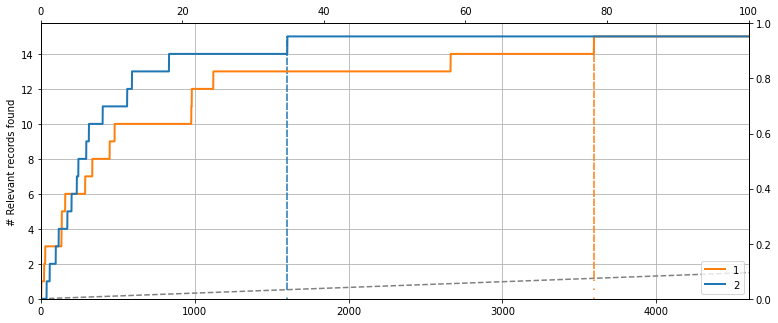

In [58]:
with Plot.from_paths(NB_files[:]) as plot:
  inc_plot = plot.new("inclusion", result_format="number")
  inc_plot.set_grid()
  inc_plot.set_xlim(0, 4600)
  inc_plot.ax.legend([1,2,3,4,5,6,7,8,9], loc='lower right')
  inc_plot.add_random(add_text=False)

  inc_plot.ax2.set_xlabel("")

  all_files = all(plot.is_file.values())
  for key in list(plot.analyses):
      if all_files or not plot.is_file[key]:
          inc_plot.add_wss(
              key, 100, add_value=True, add_text=False)

  inc_plot.fig.set_size_inches(12, 5, forward=True)

  inc_plot.show()
  inc_plot.save("plots\simulation_fromNBSP_results.png")

In [76]:
stats(NB_files[1])

************  nb_tf-idf.h5  **************

-----------  general  -----------
Number of runs            : 1
Number of papers          : 46376
Number of included papers : 63
Number of excluded papers : 46313
Number of unlabeled papers: 0
Number of queries         : 3571

-----------  settings  -----------
data_name         : brouwer_clean
model             : nb
query_strategy    : max
balance_strategy  : double
feature_extraction: tfidf
n_instances       : 1
n_queries         : min
n_prior_included  : 1
n_prior_excluded  : 1
mode              : simulate
model_param       : {'alpha': 3.822}
query_param       : {}
feature_param     : {'ngram_max': 1, 'stop_words': 'english', 'split_ta': 0, 'use_keywords': 0}
balance_param     : {'a': 2.155, 'alpha': 0.94, 'b': 0.789, 'beta': 1.0}

-----------    ATD    -----------
 0.0165

Time to discovery:

    row   : value
    28463 : 3.0
    16545 : 21.0
    15300 : 28.0
    27287 : 133.0
    45758 : 135.0
    14766 : 157.0
    20221 : 286.0
    1333

In [71]:
stats(NB_files[0])

************  lr_tf-idf.h5  **************

-----------  general  -----------
Number of runs            : 1
Number of papers          : 46376
Number of included papers : 63
Number of excluded papers : 46313
Number of unlabeled papers: 0
Number of queries         : 1592

-----------  settings  -----------
data_name         : brouwer_clean
model             : logistic
query_strategy    : max
balance_strategy  : double
feature_extraction: tfidf
n_instances       : 1
n_queries         : min
n_prior_included  : 1
n_prior_excluded  : 1
mode              : simulate
model_param       : {'C': 1.0, 'class_weight': 1.0, 'n_jobs': 1}
query_param       : {}
feature_param     : {'ngram_max': 1, 'stop_words': 'english', 'split_ta': 0, 'use_keywords': 0}
balance_param     : {'a': 2.155, 'alpha': 0.94, 'b': 0.789, 'beta': 1.0}

-----------    ATD    -----------
 0.00845

Time to discovery:

    row   : value
    14766 : 37.0
    13055 : 57.0
    20221 : 96.0
    45758 : 115.0
    30429 : 171.0
    1654

## LR switchpoint runs

In [63]:
LR_files = glob.glob(os.path.join(r'simulation_output\LR', '*.h5'), recursive=False)
LR_files[:]

['simulation_output\\LR\\lr_tf-idf.h5', 'simulation_output\\LR\\nb_tf-idf.h5']

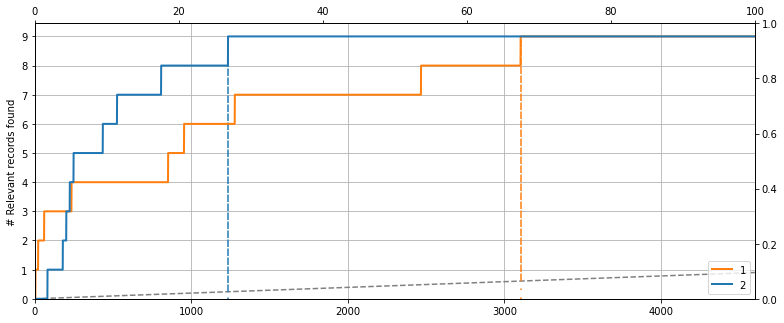

In [68]:
with Plot.from_paths(LR_files[:]) as plot:
  inc_plot = plot.new("inclusion", result_format="number")
  inc_plot.set_grid()
  inc_plot.set_xlim(0, 4600)
  inc_plot.ax.legend([1,2,3,4,5,6,7,8,9], loc='lower right')
  inc_plot.add_random(add_text=False)

  inc_plot.ax2.set_xlabel("")

  all_files = all(plot.is_file.values())
  for key in list(plot.analyses):
      if all_files or not plot.is_file[key]:
          inc_plot.add_wss(
              key, 100, add_value=True, add_text=False)

  inc_plot.fig.set_size_inches(12, 5, forward=True)

  inc_plot.show()
  inc_plot.save("plots\simulation_fromNBSP_results.png")

In [75]:
stats(LR_files[0])

************  lr_tf-idf.h5  **************

-----------  general  -----------
Number of runs            : 1
Number of papers          : 46376
Number of included papers : 63
Number of excluded papers : 46313
Number of unlabeled papers: 0
Number of queries         : 1225

-----------  settings  -----------
data_name         : brouwer_clean
model             : logistic
query_strategy    : max
balance_strategy  : double
feature_extraction: tfidf
n_instances       : 1
n_queries         : min
n_prior_included  : 1
n_prior_excluded  : 1
mode              : simulate
model_param       : {'C': 1.0, 'class_weight': 1.0, 'n_jobs': 1}
query_param       : {}
feature_param     : {'ngram_max': 1, 'stop_words': 'english', 'split_ta': 0, 'use_keywords': 0}
balance_param     : {'a': 2.155, 'alpha': 0.94, 'b': 0.789, 'beta': 1.0}

-----------    ATD    -----------
 0.00989

Time to discovery:

    row   : value
    15300 : 82.0
    30429 : 179.0
    28463 : 201.0
    21425 : 223.0
    27287 : 247.0
    74

# Extract state from H5

In [79]:
import h5py
import nexusformat.nexus as nx
import numpy as np
import datetime

def extract_state(file):
    # gets records 1 to 1000

    f = h5py.File(file, 'r')
    fn = nx.nxload(file)

    print(fn.tree)

    state_1000 = f.get('results/1000/train_idx')[:]

    np.savetxt(r"simulation_states\records_1000.txt", state_1000, fmt='%-10i')

In [ ]:
extract_state(r'simulation_output\lr_tfidf.h5')

In [89]:
files[:]

['simulation_output\\lr_doc2vec.h5',
 'simulation_output\\lr_sbert.h5',
 'simulation_output\\lr_tfidf.h5',
 'simulation_output\\nb_tfidf.h5',
 'simulation_output\\nn-2-layer_doc2vec.h5',
 'simulation_output\\nn-2-layer_sbert.h5',
 'simulation_output\\rf_doc2vec.h5',
 'simulation_output\\rf_tfidf.h5',
 'simulation_output\\svm_tfidf.h5']

In [117]:
# extract feature matrix training time
print("feature extractor time: ")

for file in files:
    f = h5py.File(file, 'r')
    start = np.datetime64(f.get('results/0/').attrs['creation_time'])
    stop = np.datetime64(f.get('results/1/').attrs['creation_time'])
    print(file, ": ", str(datetime.timedelta(seconds=(stop - start) / np.timedelta64(1, 's'))))

feature extractor time: 
simulation_output\lr_doc2vec.h5 :  0:18:01.806463
simulation_output\lr_sbert.h5 :  6:27:23.235485
simulation_output\lr_tfidf.h5 :  0:00:13.624513
simulation_output\nb_tfidf.h5 :  0:00:15.539141
simulation_output\nn-2-layer_doc2vec.h5 :  0:18:03.919284
simulation_output\nn-2-layer_sbert.h5 :  6:58:30.895628
simulation_output\rf_doc2vec.h5 :  0:15:42.613961
simulation_output\rf_tfidf.h5 :  0:00:15.569852
simulation_output\svm_tfidf.h5 :  0:00:15.576340
